# Extract metadata of sequencing runs(SRR IDs) that are corresponding to each GSE ID. Please notice that this step is performed on the HPC.

Generated four files:

(1). <updated_GSE_IDs_in_both_metadata.csv> ;
     <do_not_have_sequencing_data_in_both.csv>



(2). <updated_GSE_IDs_only_in_pub_metadata.csv> ;
     <do_not_have_sequencing_data_only_in_pub.csv>

GSE IDs mentioned in both preprints and publications:

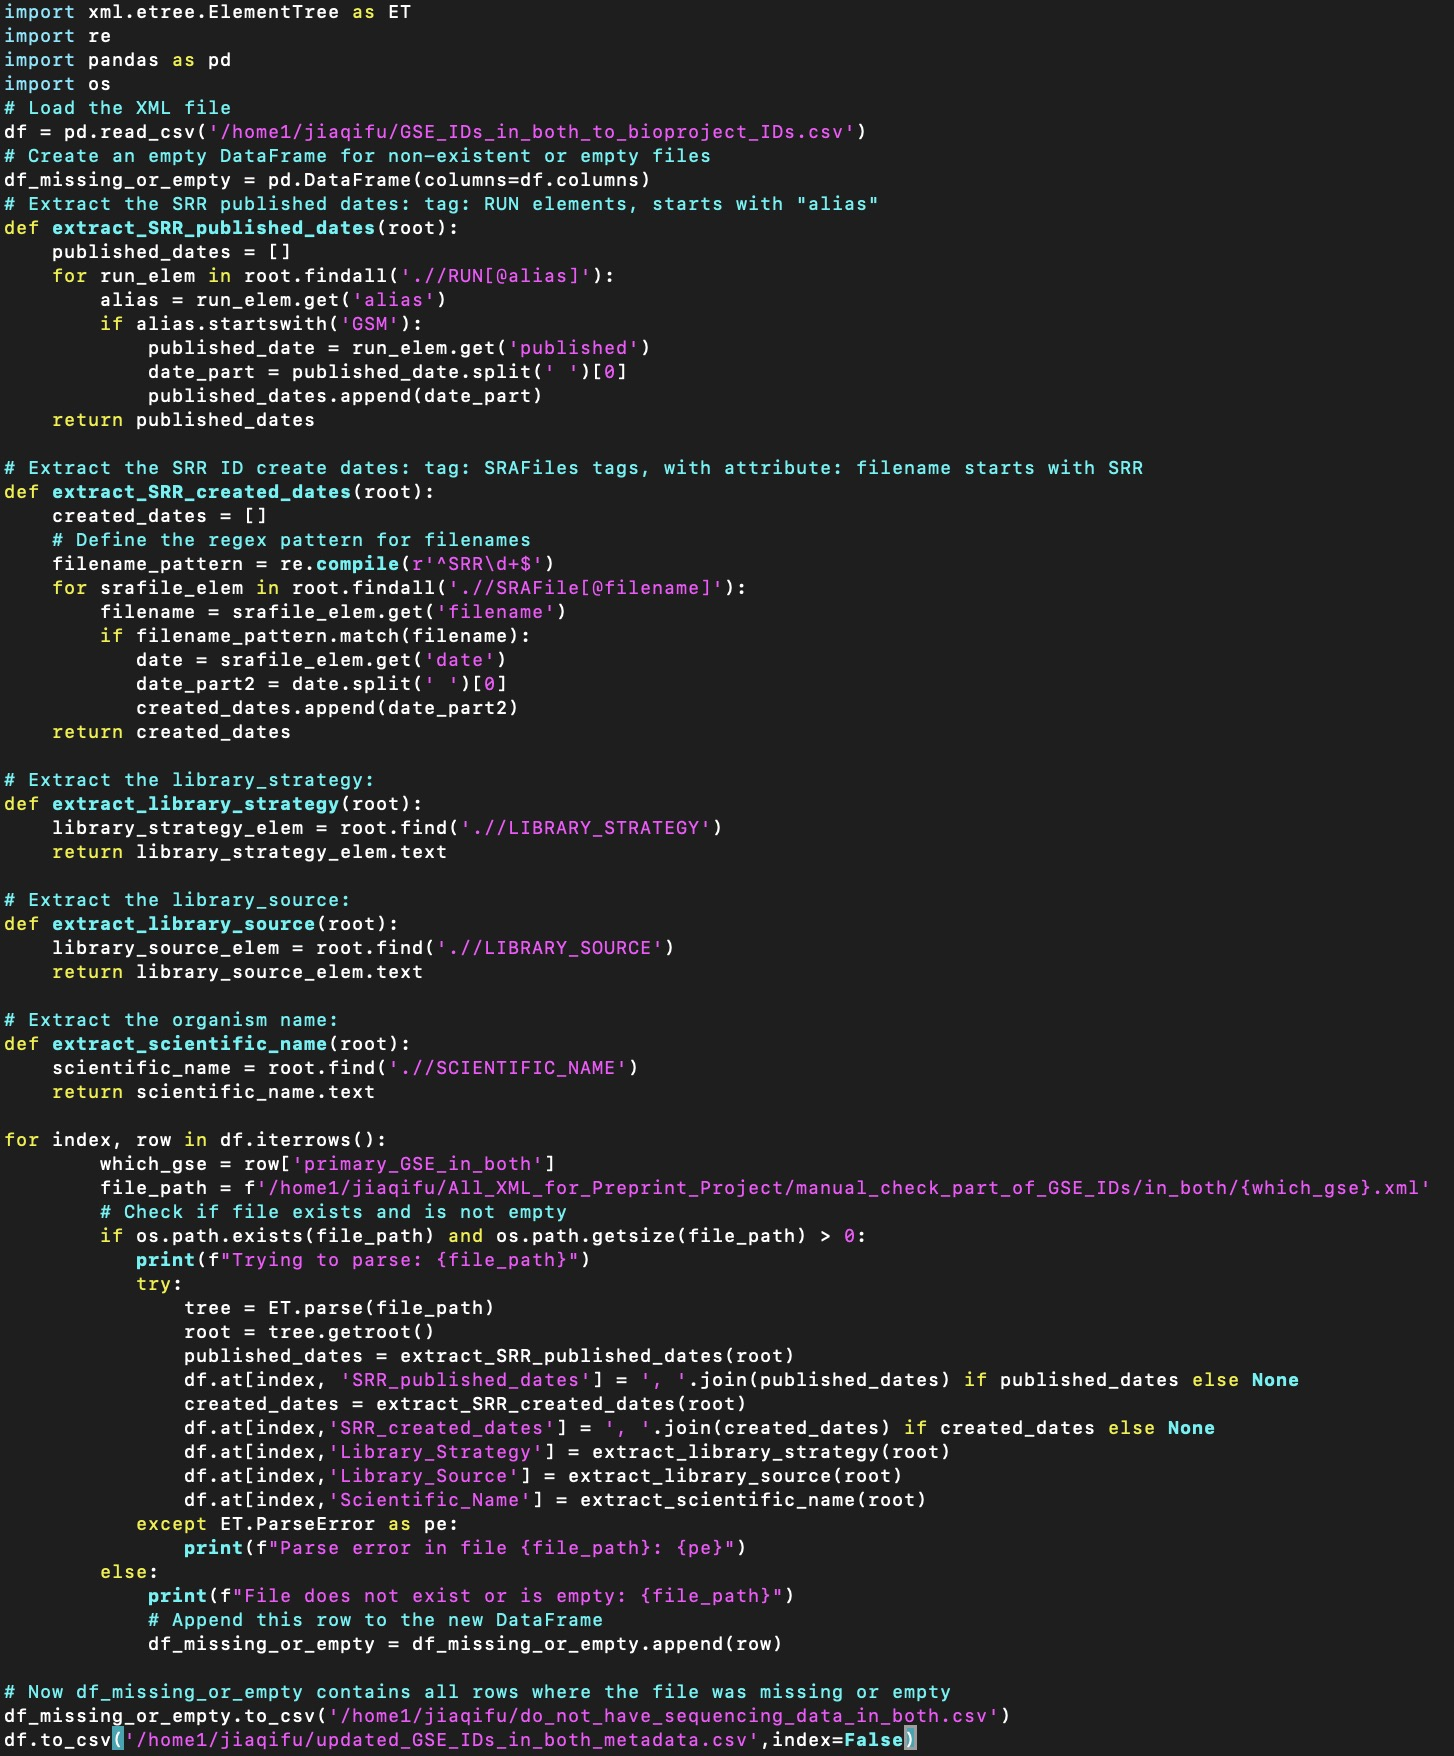

GSE IDs mentioned only in publications:

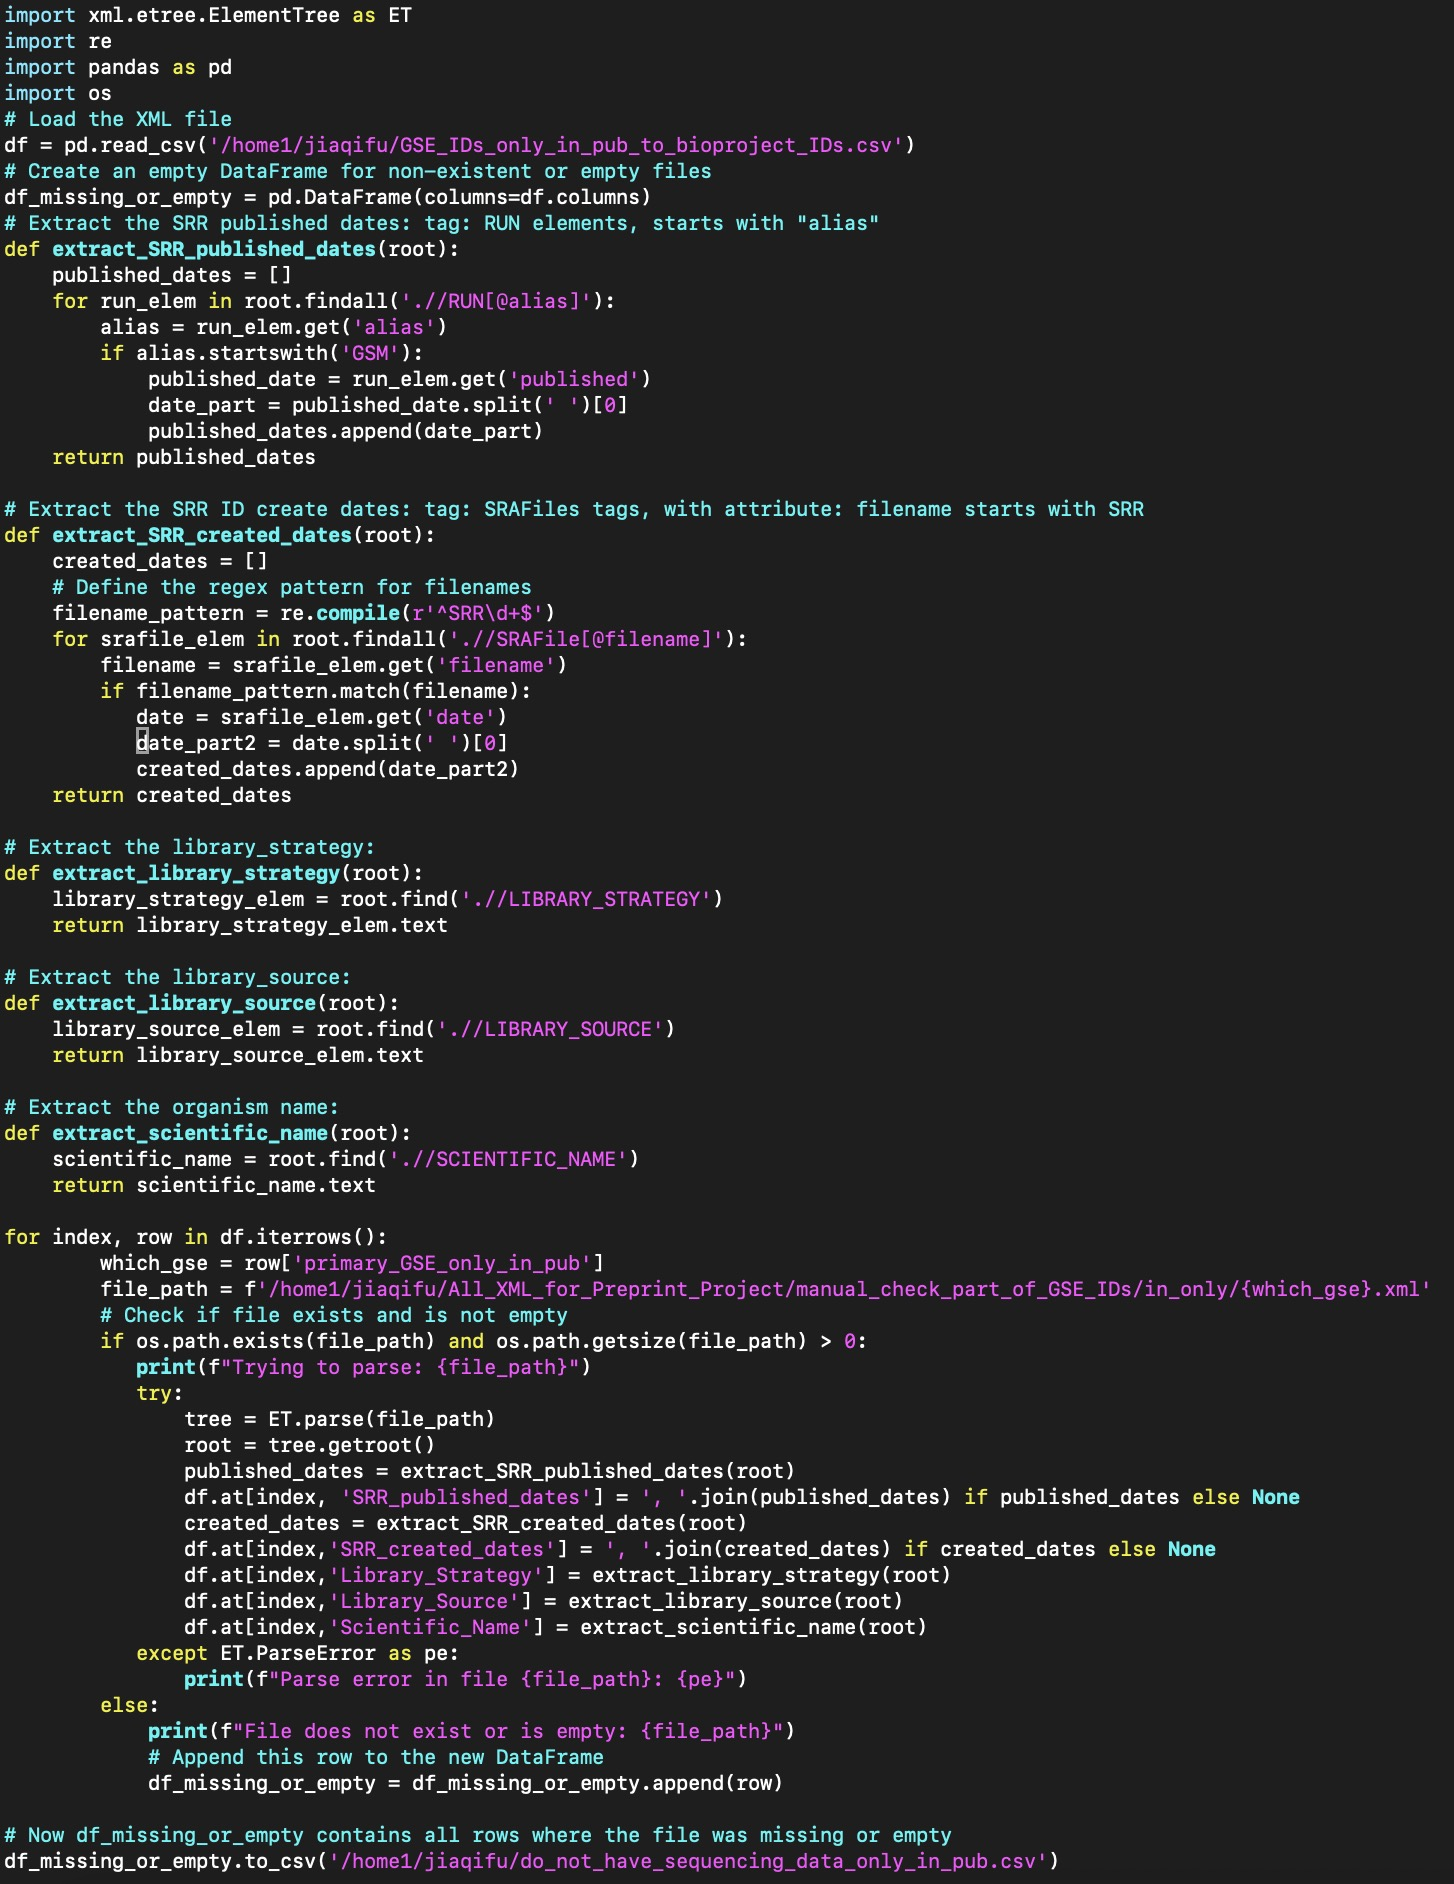

Note:

(1). <updated_GSE_IDs_in_both_metadata.csv> ; <updated_GSE_IDs_only_in_pub_metadata.csv> : Most of GSE IDs in these two files are related to sequencing data (SRR IDs), except for those GSE IDs appearing in the "do_not_have_sequencing_data".

(2). <do_not_have_sequencing_data.csv> ; <do_not_have_sequencing_data_only_in_pub.csv> : GSE IDs in these two files do not associated with any sequencing data

# Clean these two dataset:

<updated_GSE_IDs_in_both_metadata.csv>

<updated_GSE_IDs_only_in_pub_metadata.csv>

# Rename columns and concatenate into a large file

In [ ]:
import pandas as pd

df_GSE_IDs_in_both_metadata = pd.read_csv("updated_GSE_IDs_in_both_metadata.csv")
df_GSE_IDs_only_in_pub_metadata = pd.read_csv("updated_GSE_IDs_only_in_pub_metadata.csv")

print(len(df_GSE_IDs_in_both_metadata))
print(len(df_GSE_IDs_only_in_pub_metadata))

788
343


In [ ]:
df_GSE_IDs_in_both_metadata.fillna("nan", inplace=True)
df_GSE_IDs_only_in_pub_metadata.fillna("nan", inplace=True)

df_GSE_ID_in_both_cleaned = df_GSE_IDs_in_both_metadata.loc[df_GSE_IDs_in_both_metadata['SRR_published_dates']!='nan']
df_GSE_ID_only_in_pub_cleaned = df_GSE_IDs_only_in_pub_metadata.loc[df_GSE_IDs_only_in_pub_metadata['SRR_published_dates']!='nan']

print(len(df_GSE_ID_in_both_cleaned))
print(len(df_GSE_ID_only_in_pub_cleaned))

692
309


Make a validation:

96+692=788

309+34=343

In [ ]:
df_GSE_ID_in_both_donnot_have_SRR = pd.read_csv("do_not_have_sequencing_data_in_both.csv")
df_GSE_ID_only_in_pub_donnot_have_SRR = pd.read_csv("do_not_have_sequencing_data_only_in_pub.csv")

print(len(df_GSE_ID_in_both_donnot_have_SRR))
print(len(df_GSE_ID_only_in_pub_donnot_have_SRR))

96
34


Rename column:

In [ ]:
df_GSE_ID_in_both_cleaned.rename(columns={'primary_GSE_in_both':'accession_found'},inplace=True)
df_GSE_ID_in_both_cleaned['Sharing Scenario']= 'GSE IDs in both'

<ipython-input-8-f5b2755578f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GSE_ID_in_both_cleaned.rename(columns={'primary_GSE_in_both':'accession_found'},inplace=True)
<ipython-input-8-f5b2755578f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GSE_ID_in_both_cleaned['Sharing Scenario']= 'GSE IDs in both'


In [ ]:
df_GSE_ID_only_in_pub_cleaned.rename(columns={'primary_GSE_only_in_pub':'accession_found'},inplace=True)
df_GSE_ID_only_in_pub_cleaned['Sharing Scenario']= 'GSE IDs only in pub'

<ipython-input-9-4b4ed1f107a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GSE_ID_only_in_pub_cleaned.rename(columns={'primary_GSE_only_in_pub':'accession_found'},inplace=True)
<ipython-input-9-4b4ed1f107a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GSE_ID_only_in_pub_cleaned['Sharing Scenario']= 'GSE IDs only in pub'


Concatenate into a large file:

In [ ]:
df_GSE_ID_whole = pd.concat([df_GSE_ID_in_both_cleaned,df_GSE_ID_only_in_pub_cleaned])

In [ ]:
df_GSE_ID_whole.to_csv("prepared_GSE_IDs_whole_metadata.csv")

# Pick out the column "SRR_created_dates" and make a new dataframe

In [ ]:
import pandas as pd

df_GSE_ID_whole = pd.read_csv("prepared_GSE_IDs_whole_metadata.csv")
df_GSE_ID_whole_with_SRR_created_dates = df_GSE_ID_whole[['preprint_doi','publication_doi','accession_found','SRR_created_dates']]

In [ ]:
df_GSE_ID_whole_with_SRR_created_dates.to_csv('prepared_GSE_IDs_with_SRR_created_dates.csv')

# Apply the analysis

## First expand the SRR published dates so that each date is placed into its own cell.

In [ ]:
import pandas as pd

df_GSE_ID_whole = pd.read_csv("prepared_GSE_IDs_whole_metadata.csv")
df_GSE_ID_whole.drop(columns=['SRR_created_dates'],inplace=True)

# Split the columns into lists
df_GSE_ID_whole['SRR_published_dates'] = df_GSE_ID_whole['SRR_published_dates'].str.split(',')

df_GSE_ID_whole_expanded = df_GSE_ID_whole.explode('SRR_published_dates')

In [ ]:
print(len(df_GSE_ID_whole_expanded))

65779


In [ ]:
df_GSE_ID_whole_expanded.to_csv("df_GSE_ID_whole_expanded_65779.csv")

## Taking apart the whole dataset into four dataframes

"df_GSE_ID_whole_expanded_65779.csv" because it has nearly 70k rows, the maximum processing ability for google colab is 20k rows; thus we need to take the whole datasheet into four parts.

In [ ]:
import re

# Replace the 'GSE' prefix with an empty string
df_GSE_ID_whole_expanded['accession_found'] = df_GSE_ID_whole_expanded['accession_found'].str.replace(r'^GSE', '', regex=True)
accession_list = df_GSE_ID_whole_expanded['accession_found'].tolist()

results = []
starting_number_set = []

i = 0
while i < len(accession_list) - 1:
    if 19000 < i < 20000 and len(starting_number_set) == 0:
        if accession_list[i] != accession_list[i + 1]:
            df_1 = df_GSE_ID_whole_expanded.iloc[0:i+1]
            results.append(df_1)
            starting_number_set.append(i + 1)
            print(f"First dataframe ends at index {i+1}, Second dataframe starts at {i+2}")
            i += 1
            continue

    if 35000 < i < 40000 and len(starting_number_set) == 1:
        if accession_list[i] != accession_list[i + 1]:
            df_2 = df_GSE_ID_whole_expanded.iloc[starting_number_set[0]:i+1]
            results.append(df_2)
            starting_number_set.append(i + 1)
            print(f"Second dataframe ends at index {i+1}, Third dataframe starts at {i+2}")
            i += 1
            continue

    if 55000 < i < 60000 and len(starting_number_set) == 2:
        if accession_list[i] != accession_list[i + 1]:
            df_3 = df_GSE_ID_whole_expanded.iloc[starting_number_set[1]:i+1]
            results.append(df_3)
            starting_number_set.append(i + 1)
            print(f"Third dataframe ends at index {i+1}, Fourth dataframe starts at {i+2}")
            i += 1
            continue

    if i > 60000 and len(starting_number_set) == 3:
        if accession_list[i] != accession_list[i + 1]:
            df_4 = df_GSE_ID_whole_expanded.iloc[starting_number_set[2]:]
            results.append(df_4)
            print(f"Fourth dataframe starts at {starting_number_set[2]+1} and ends at the end of the dataframe.")
            break  # no need to continue after the last condition is met

    i += 1
    continue


for idx, df in enumerate(results):
    print(f"DataFrame {idx + 1}:")
    print(df)

First dataframe ends at index 19024, Second dataframe starts at 19025
Second dataframe ends at index 35412, Third dataframe starts at 35413
Third dataframe ends at index 57631, Fourth dataframe starts at 57632
Fourth dataframe starts at 57632 and ends at the end of the dataframe.
DataFrame 1:
     Unnamed: 0    preprint_doi               publication_doi accession_found  \
0             0  10.1101/459289     10.1007/s13238-019-0650-z           55600   
0             0  10.1101/459289     10.1007/s13238-019-0650-z           55600   
1             1  10.1101/425348  10.1016/j.celrep.2019.03.108          115929   
1             1  10.1101/425348  10.1016/j.celrep.2019.03.108          115929   
1             1  10.1101/425348  10.1016/j.celrep.2019.03.108          115929   
..          ...             ...                           ...             ...   
261         293  10.1101/160804    10.1038/s41598-018-20372-7           98734   
261         293  10.1101/160804    10.1038/s41598-018-2037

Make a validation:

In [ ]:
print(len(df_1))
print(len(df_2))
print(len(df_3))
print(len(df_4))
full_length = len(df_1)+len(df_2)+len(df_3)+len(df_4)
print(full_length)

19024
16388
22219
8148
65779


In [ ]:
print(df_1.head(3))
print(df_1.tail(3))

   Unnamed: 0    preprint_doi               publication_doi accession_found  \
0           0  10.1101/459289     10.1007/s13238-019-0650-z           55600   
0           0  10.1101/459289     10.1007/s13238-019-0650-z           55600   
1           1  10.1101/425348  10.1016/j.celrep.2019.03.108          115929   

  bioproject_ID SRR_published_dates Library_Strategy  Library_Source  \
0   PRJNA240203          2019-02-27          RNA-Seq  TRANSCRIPTOMIC   
0   PRJNA240203          2019-02-27          RNA-Seq  TRANSCRIPTOMIC   
1   PRJNA476539          2019-04-23         ChIP-Seq         GENOMIC   

  Scientific_Name Sharing Scenario  
0    Mus musculus  GSE IDs in both  
0    Mus musculus  GSE IDs in both  
1    Mus musculus  GSE IDs in both  
     Unnamed: 0    preprint_doi             publication_doi accession_found  \
261         293  10.1101/160804  10.1038/s41598-018-20372-7           98734   
261         293  10.1101/160804  10.1038/s41598-018-20372-7           98734   
261      

In [ ]:
print(df_2.head(3))
print(df_2.tail(3))

     Unnamed: 0    preprint_doi             publication_doi accession_found  \
262         294  10.1101/143917  10.1038/s41598-018-21104-7           99248   
262         294  10.1101/143917  10.1038/s41598-018-21104-7           99248   
262         294  10.1101/143917  10.1038/s41598-018-21104-7           99248   

    bioproject_ID SRR_published_dates Library_Strategy  Library_Source  \
262   PRJNA387704          2018-02-22          RNA-Seq  TRANSCRIPTOMIC   
262   PRJNA387704          2018-02-22          RNA-Seq  TRANSCRIPTOMIC   
262   PRJNA387704          2018-02-22          RNA-Seq  TRANSCRIPTOMIC   

    Scientific_Name Sharing Scenario  
262    Homo sapiens  GSE IDs in both  
262    Homo sapiens  GSE IDs in both  
262    Homo sapiens  GSE IDs in both  
     Unnamed: 0    preprint_doi               publication_doi accession_found  \
612         695  10.1101/032920  10.1371/journal.pgen.1006295           73920   
612         695  10.1101/032920  10.1371/journal.pgen.1006295       

In [ ]:
print(df_3.head(3))
print(df_3.tail(3))

     Unnamed: 0    preprint_doi               publication_doi accession_found  \
613         696  10.1101/026831  10.1371/journal.pgen.1006338           73765   
613         696  10.1101/026831  10.1371/journal.pgen.1006338           73765   
613         696  10.1101/026831  10.1371/journal.pgen.1006338           73765   

    bioproject_ID SRR_published_dates Library_Strategy  Library_Source  \
613   PRJNA297863          2016-09-07        miRNA-Seq  TRANSCRIPTOMIC   
613   PRJNA297863          2016-09-07        miRNA-Seq  TRANSCRIPTOMIC   
613   PRJNA297863          2016-09-07        miRNA-Seq  TRANSCRIPTOMIC   

    Scientific_Name Sharing Scenario  
613    Homo sapiens  GSE IDs in both  
613    Homo sapiens  GSE IDs in both  
613    Homo sapiens  GSE IDs in both  
     Unnamed: 0    preprint_doi    publication_doi accession_found  \
803         122  10.1101/062919  10.1038/srep39921           77288   
803         122  10.1101/062919  10.1038/srep39921           77288   
803         

In [ ]:
print(df_4.head(3))
print(df_4.tail(3))

     Unnamed: 0    preprint_doi          publication_doi accession_found  \
804         123  10.1101/557900  10.1073/pnas.2003733117          108852   
804         123  10.1101/557900  10.1073/pnas.2003733117          108852   
804         123  10.1101/557900  10.1073/pnas.2003733117          108852   

    bioproject_ID SRR_published_dates Library_Strategy  Library_Source  \
804   PRJNA428948          2018-11-09          RIP-Seq  TRANSCRIPTOMIC   
804   PRJNA428948          2018-11-09          RIP-Seq  TRANSCRIPTOMIC   
804   PRJNA428948          2018-11-09          RIP-Seq  TRANSCRIPTOMIC   

          Scientific_Name     Sharing Scenario  
804  Arabidopsis thaliana  GSE IDs only in pub  
804  Arabidopsis thaliana  GSE IDs only in pub  
804  Arabidopsis thaliana  GSE IDs only in pub  
      Unnamed: 0    preprint_doi               publication_doi  \
1000         342  10.1101/574509  10.1016/j.celrep.2019.09.066   
1000         342  10.1101/574509  10.1016/j.celrep.2019.09.066   
1000

In [ ]:
df_1['accession_found'] = 'GSE' + df_1['accession_found']
df_2['accession_found'] = 'GSE' + df_2['accession_found']
df_3['accession_found'] = 'GSE' + df_3['accession_found']
df_4['accession_found'] = 'GSE' + df_4['accession_found']

<ipython-input-23-7498576eece8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['accession_found'] = 'GSE' + df_1['accession_found']
<ipython-input-23-7498576eece8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['accession_found'] = 'GSE' + df_2['accession_found']
<ipython-input-23-7498576eece8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
df_1.to_csv("df_1.csv")
df_2.to_csv("df_2.csv")
df_3.to_csv("df_3.csv")
df_4.to_csv("df_4.csv")

# Calculate how many different dates are there when author choose to upload their sequencing data:

Note: We are going to process 4 dataframes at one time

In [ ]:
from ast import And
import pandas as pd
from datetime import datetime

def process_dataframe(df):
    # Convert the column "accession_found" in the dataframe to list
    gse_founds = df['accession_found'].tolist()
    # Convert the column "SRR_published_dates" in the dataframe to list
    srr_dates = df['SRR_published_dates'].tolist()
    # Make sure the column SRR_dates is string rather than the float
    df['SRR_published_dates'] = df['SRR_published_dates'].astype(str)

    # The following section checks for one GSE IDs having how many duplicates
    # This line defines a function named find_the_number_of_same_GSE_IDs that takes one parameter, same_GSE_IDs, which is expected to be a list.
    def find_the_number_of_same_GSE_IDs(same_GSE_IDs):
        # Initializes an empty list duplicate_gses to store the counts of consecutive duplicates
        duplicate_gses = []
        # Initializes a counter i to 0. This counter will track the number of consecutive duplicates
        i = 0
        # Iterate over the list while avoiding an index out of range error
        for count_gse in range(len(same_GSE_IDs) - 1):
            # This line checks if the current element (same_GSE_IDs[count_gse]) is the same as the next element (same_GSE_IDs[count_gse + 1])
            if same_GSE_IDs[count_gse] == same_GSE_IDs[count_gse + 1]:
               i += 1
            else:
                # Append the count of consecutive elements and reset i
                duplicate_gses.append(i + 1)
                # The counter i is reset to 0 for the next set of consecutive duplicates
                i = 0
        # After the loop, the function appends the count for the last set of duplicates to duplicate_gses.
        duplicate_gses.append(i + 1)
        return duplicate_gses

    # This defines a function named sort_dates that takes one argument, dates_list, which is expected to be a list of date strings.
    def sort_dates(dates_list):
        # Convert string dates to datetime objects
        dates = [datetime.strptime(date.strip(), '%Y-%m-%d') for date in dates_list]
        # Sort the datetime objects
        sorted_dates = sorted(dates)
        # Convert the datetime objects back to strings
        sorted_dates_str = [date.strftime('%m/%d/%Y') for date in sorted_dates]
        return sorted_dates_str

    # Call the function with gse_founds and print the results
    chunks = find_the_number_of_same_GSE_IDs(gse_founds)
    # Initialize a counter k
    k = 0
    # for exapmle: [7, 10, 22, 7, 1, 30, 17, 10, 12, 94]
    print(chunks)
    # Initialize a dictionary to store
    date_counts = {}
    # Iterate over all the items in the list-chunks
    for chunk in chunks:
        # Splicing, starting from k = 0, the first splicing is gse_founds[0:0+7]
        gse_chunks = gse_founds[k:k+chunk]
        srr_dates_chunks = srr_dates[k:k+chunk]
        # Convert and sort the dates within the chunk
        sorted_dates = sort_dates(srr_dates_chunks)
        # Print the sorted dates for this chunk
        print(sorted_dates)

        # Handle the case where there's only one date in sorted_dates
        if len(sorted_dates) == 1:
           # The count of date equals to 1
           x = 1
           list_for_only_one = [sorted_dates[0]]
           print(x)
           print(list_for_only_one)
           # The index of the only item in the list-sorted_dates is 0 and the count is 1, store this value to the dictionary: date_counts
           date_counts[sorted_dates[0]] = 1
           print(date_counts)

        # Process only if there are more than one date
        else:
           # Initialize two counter x and z
           x = 0
           z = 0
           # Initialize three dictionaries to store the value
           date_counts1 = {}
           date_counts2 = {}
           date_counts3 = {}
           date_counts4 = {}

           if sorted_dates[-1] != sorted_dates[-2]:
              date_counts3[sorted_dates[-1]] = 1

           # Iterate over list "sorted_dates", "item" is actually a loop counter variable
           for item in range(len(sorted_dates)-1):
               # If the first date(sorted_dates[item]) within the list-sorted_dates equals to the following date(sorted_dates[item + 1])
               if sorted_dates[item] == sorted_dates[item + 1]:
                  # x increment by 1
                  x += 1
                  # z represents at the current stage how many dates are equal in total
                  z = x + 1
                  print(z)
                  print([sorted_dates[item]])
                  # The purpose of this line is to create or update an entry in the dictionary date_counts1-
                  # -where each key is a unique date and each value is the count of how many times that date appears consecutively in sorted_dates
                  date_counts1[sorted_dates[item]] = z

               # If the first date(sorted_dates[item]) within the list-sorted_dates does not equal to the following date(sorted_dates[item + 1])
               else:
                    # The purpose of this check is to specifically identify and process the first date in the list when it doesn't have a duplicate following it
                    if sorted_dates[item] == sorted_dates[0] or sorted_dates[item] != sorted_dates[item - 1]:
                       # Then the total count for the first date which is different with others is 1
                       print(sorted_dates[item])
                       # This line updates or creates an entry in the dictionary date_counts2, setting the value for the key (which is the current date) to 1
                       date_counts2[sorted_dates[item]] = 1

                    else:
                        if sorted_dates[item] == sorted_dates[item - 1]:
                           print(1)
                           print([sorted_dates[item + 1]])
                    x = 0
                    z = 0
           # Combine all dictionaries
           date_counts4={**date_counts2, **date_counts1, **date_counts3}
           print(date_counts4)

           # Store the date counts in the DataFrame
           for q in range(k, k + chunk):
               df.at[q, 'statistics'] = str(date_counts)
               df.at[q, 'statistics'] = str(date_counts4)

        # The next splicing starts from the line k+chunk
        k += chunk

df_1 = pd.read_csv("df_1.csv")
df_2 = pd.read_csv("df_2.csv")
df_3 = pd.read_csv("df_3.csv")
df_4 = pd.read_csv("df_4.csv")
# List of DataFrames
dataframes = [df_1,df_2,df_3,df_4]

# Apply the processing function to each DataFrame
processed_dataframes = [process_dataframe(df) for df in dataframes]

流式输出内容被截断，只能显示最后 5000 行内容。
4
['04/15/2021']
5
['04/15/2021']
6
['04/15/2021']
7
['04/15/2021']
8
['04/15/2021']
9
['04/15/2021']
10
['04/15/2021']
11
['04/15/2021']
12
['04/15/2021']
13
['04/15/2021']
14
['04/15/2021']
15
['04/15/2021']
16
['04/15/2021']
17
['04/15/2021']
18
['04/15/2021']
19
['04/15/2021']
20
['04/15/2021']
21
['04/15/2021']
22
['04/15/2021']
23
['04/15/2021']
24
['04/15/2021']
25
['04/15/2021']
26
['04/15/2021']
27
['04/15/2021']
28
['04/15/2021']
29
['04/15/2021']
30
['04/15/2021']
31
['04/15/2021']
32
['04/15/2021']
33
['04/15/2021']
34
['04/15/2021']
35
['04/15/2021']
36
['04/15/2021']
37
['04/15/2021']
38
['04/15/2021']
39
['04/15/2021']
40
['04/15/2021']
41
['04/15/2021']
42
['04/15/2021']
43
['04/15/2021']
44
['04/15/2021']
45
['04/15/2021']
46
['04/15/2021']
47
['04/15/2021']
48
['04/15/2021']
49
['04/15/2021']
50
['04/15/2021']
51
['04/15/2021']
52
['04/15/2021']
53
['04/15/2021']
54
['04/15/2021']
55
['04/15/2021']
56
['04/15/2021']
57
['04/15/2021']
58
['04

In [ ]:
print(len(df_1))
print(len(df_2))
print(len(df_3))
print(len(df_4))

19024
16388
22219
8148


In [ ]:
def drop_duplicated_columns(df):
    df_dropped = df.drop_duplicates(subset=['preprint_doi','publication_doi','accession_found','statistics'])
    print(len(df_dropped))
    return df_dropped

dataframes = [df_1,df_2,df_3,df_4]
dropped_dataframes = [drop_duplicated_columns(df) for df in dataframes]

262
344
190
194


In [ ]:
After_processed_whole = pd.concat(dropped_dataframes)
print(len(After_processed_whole))

990


Make a validation to see if the total number is in line with the original data

In [ ]:
validation = pd.read_csv("prepared_GSE_IDs_whole_metadata.csv")
validation_new = validation.drop_duplicates(subset=['preprint_doi','publication_doi','accession_found'])
print(len(validation_new))

990


Deal with "nan" values in the "statistics" column

In [ ]:
After_processed_whole = After_processed_whole.fillna("N/A")
nan_values = After_processed_whole.loc[After_processed_whole['statistics']=='N/A']
if not nan_values.empty:
    for index,row in nan_values.iterrows():
        SRR_date = row['SRR_published_dates']
        After_processed_whole.at[index, 'statistics'] = f"{{'{SRR_date}': 1}}"
After_processed_whole

,Unnamed: 0.1,Unnamed: 0,preprint_doi,publication_doi,accession_found,bioproject_ID,SRR_published_dates,Library_Strategy,Library_Source,Scientific_Name,Sharing Scenario,statistics
0,0,0,10.1101/459289,10.1007/s13238-019-0650-z,GSE55600,PRJNA240203,2019-02-27,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,GSE IDs in both,{'02/27/2019': 2}
2,1,1,10.1101/425348,10.1016/j.celrep.2019.03.108,GSE115929,PRJNA476539,2019-04-23,ChIP-Seq,GENOMIC,Mus musculus,GSE IDs in both,{'04/23/2019': 8}
10,2,2,10.1101/393876,10.1016/j.celrep.2019.07.084,GSE133660,PRJNA552100,2019-07-08,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,GSE IDs in both,{'07/08/2019': 9}
19,3,3,10.1101/624957,10.1016/j.celrep.2019.08.089,GSE125523,PRJNA516680,2019-09-03,ATAC-seq,GENOMIC,Mus musculus,GSE IDs in both,{'09/03/2019': 8}
27,4,4,10.1101/600932,10.1016/j.celrep.2019.09.017,GSE120520,PRJNA493256,2019-10-16,ncRNA-Seq,TRANSCRIPTOMIC,Homo sapiens,GSE IDs in both,{'10/16/2019': 72}
...,...,...,...,...,...,...,...,...,...,...,...,...
8062,996,334,10.1101/2020.03.08.982769,10.7554/eLife.56523,GSE144919,PRJNA605337,2020-07-23,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,GSE IDs only in pub,{'07/23/2020': 6}
8068,997,335,10.1101/2020.03.08.982769,10.7554/eLife.56523,GSE144920,PRJNA605338,2020-07-23,RIP-Seq,TRANSCRIPTOMIC,Mus musculus,GSE IDs only in pub,{'07/23/2020': 6}
8074,998,336,10.1101/2021.05.06.442900,10.7554/eLife.69843,GSE186004,PRJNA771684,2021-12-19,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,GSE IDs only in pub,{'12/19/2021': 12}
8086,999,341,10.1101/2021.06.15.448594,10.3390/cancers13174250,GSE153595,PRJNA643285,2021-01-02,Bisulfite-Seq,GENOMIC,Homo sapiens,GSE IDs only in pub,{'01/02/2021': 24}


In [ ]:
After_processed_whole.to_csv("final_990_GSE_IDs_from_manual_check_with_metadata.csv")

## Investigate the pattern behind the behavior of uploading sequencing data

### Convert numbers to percentages:

In [ ]:
import pandas as pd
import ast

df_990 = pd.read_csv("final_990_GSE_IDs_from_manual_check_with_metadata.csv",index_col=None)
df_990.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.2'],inplace=True)
df_990.rename(columns={'statistics' : "{'SRR_Date' : 'count'}"},inplace=True)
df_990["{'SRR_Date' : 'count'}"]=df_990["{'SRR_Date' : 'count'}"].astype(str)

def calculate_rate(row):
    try:
        dates_counts = eval(row["{'SRR_Date' : 'count'}"])
    except SyntaxError:
        return None

    total_count = sum(dates_counts.values())

    # Check for situation 1: Only one date and value
    if len(dates_counts) == 1:
        date, count = next(iter(dates_counts.items()))
        return {date: '100%'}
    # Situation 2: Multiple dates and values
    else:
        rate_dict = {date: f"{count / total_count * 100:.1f}%" for date, count in dates_counts.items()}
        return rate_dict


df_990["{'SRR_Date' : 'rate'}"] = df_990.apply(calculate_rate, axis=1)
df_990.to_csv("final_990_GSE_IDs_from_manual_check_with_rate.csv")

### Percentages of sequencing data uploaded on the first day, the last day, and the intermediate days of the uploading session

In [ ]:
import pandas as pd
import ast

df_SRR_rate = pd.read_csv("final_990_GSE_IDs_from_manual_check_with_rate.csv",index_col=None)

first_day_values = []
last_day_values = []

first_day_values1 = []
last_day_values1 = []

mid_day_values = []

for i, row in enumerate(df_SRR_rate["{'SRR_Date' : 'rate'}"]):
    dict_row = ast.literal_eval(row)
    if isinstance(dict_row, dict):
        values = list(dict_row.values())

        # Case 1: Only one date
        if len(dict_row) == 1:
            df_SRR_rate.at[i, "Pattern_the_first_day"] = "N/A"
            df_SRR_rate.at[i, "Pattern_dates_in_the_middle"] = "N/A"
            df_SRR_rate.at[i, "Pattern_the_last_day"] = "N/A"

        # Case 2: Two dates
        elif len(dict_row) == 2:
            first_day_values.append(values[0])
            last_day_values.append(values[-1])
            df_SRR_rate.at[i, "Pattern_the_first_day"] = values[0]
            df_SRR_rate.at[i, "Pattern_dates_in_the_middle"] = "N/A"
            df_SRR_rate.at[i, "Pattern_the_last_day"] = values[-1]

        # Case 3: More than two dates
        elif len(dict_row) > 2:
            first_day_values1.append(values[0])
            last_day_values1.append(values[-1])
            first_day_value2 = float(values[0].rstrip('%'))
            last_day_value2 = float(values[-1].rstrip('%'))
            mid_day_value = 100 - (first_day_value2 + last_day_value2)
            mid_day_values.append(f"{mid_day_value:.1f}%")
            df_SRR_rate.at[i, "Pattern_the_first_day"] = values[0]
            df_SRR_rate.at[i, "Pattern_dates_in_the_middle"] = mid_day_values[-1]
            df_SRR_rate.at[i, "Pattern_the_last_day"] = values[-1]

In [ ]:
df_SRR_rate.to_csv("final_990_GSE_IDs_from_manual_check_with_rate_and_pattern.csv")

### Calculate the date interval between different days when SRR were published

In [ ]:
import pandas as pd

df = pd.read_csv("final_990_GSE_IDs_from_manual_check_with_rate_and_pattern.csv",index_col=False)

# Define a function to calculate the time intervals based on the scenario
def calculate_time_interval(row):
    try:
        dates_counts = eval(row["{'SRR_Date' : 'count'}"])
    except SyntaxError:
        return None

    # Check for situation 1: Only one date and value
    if len(dates_counts) == 1:
        return None
    # Situation 2: Multiple dates and values
    else:
        dates = sorted(dates_counts.keys())
        intervals = [abs((pd.to_datetime(dates[i + 1]) - pd.to_datetime(dates[i])).days) for i in range(len(dates) - 1)]

        # Format intervals as strings
        formatted_intervals = [f"{interval}" for interval in intervals]
        return "{" + ", ".join(formatted_intervals) + "}"

df['time_interval'] = df.apply(calculate_time_interval, axis=1)

df = df.fillna("N/A")
df.drop(columns=['Unnamed: 0','Unnamed: 0.1','SRR_published_dates'],inplace=True)

In [ ]:
df.to_csv("final_990_GSE_IDs_from_manual_check_with_rate_and_pattern_interval.csv")

# Find each GSE ID corresponding preprint published dates and publication published dates, and paste them into the dataframe that contains all of GSE IDs from manual check


In [ ]:
import pandas as pd

df_106k = pd.read_csv("106k_preprints.csv",index_col=False)
df_final_1120 = pd.read_csv("whole_1120_df_with_GSE_public_date_from_manual_check.csv",index_col=False)
df_106k.rename(columns={'published_doi' : 'publication_doi'},inplace=True)
df_106k_picked_out = df_106k[['preprint_doi','publication_doi','preprint_date','published_date']]
df_final_1120.drop(columns=['Unnamed: 0'],inplace=True)
df_add_preprint_and_publication_published_dates = pd.merge(df_106k_picked_out,df_final_1120,on=['preprint_doi','publication_doi'], how='right')

In [ ]:
df_add_preprint_and_publication_published_dates.fillna("None",inplace=True)

In [ ]:
df_add_preprint_and_publication_published_dates.drop_duplicates(subset=['preprint_doi','publication_doi','accession_found','bioproject_ID','Sharing Scenario','Associating Sequence data','GSE_dates'],inplace=True)
print(len(df_add_preprint_and_publication_published_dates))

1117


In [ ]:
df_add_preprint_and_publication_published_dates.reset_index(drop=True,inplace=True)

Check for False Positive and change the date format

In [ ]:
nan_values = df_add_preprint_and_publication_published_dates[['preprint_date', 'published_date']].isna().sum()

In [ ]:
nan_values

preprint_date     0
published_date    0
dtype: int64

In [ ]:
from datetime import datetime
def convert_date_format(date_str):
    if pd.isna(date_str):
        return None

    try:
         need_to_convert = datetime.strptime(date_str, '%Y-%m-%d').date()
         convert = need_to_convert.strftime('%m/%d/%Y')
         return convert
    except ValueError:
        return
df_add_preprint_and_publication_published_dates['preprint_date'] = df_add_preprint_and_publication_published_dates['preprint_date'].apply(convert_date_format)
df_add_preprint_and_publication_published_dates['published_date'] = df_add_preprint_and_publication_published_dates['published_date'].apply(convert_date_format)

In [ ]:
FPs = df_add_preprint_and_publication_published_dates.loc[(df_add_preprint_and_publication_published_dates['preprint_date']=='None')|(df_add_preprint_and_publication_published_dates['published_date']=='None')]
FPs

,preprint_doi,publication_doi,preprint_date,published_date,accession_found,bioproject_ID,Sharing Scenario,Method to obtain data,Associating Sequence data,GSE_dates


In [ ]:
df_add_preprint_and_publication_published_dates

,preprint_doi,publication_doi,preprint_date,published_date,accession_found,bioproject_ID,Sharing Scenario,Method to obtain data,Associating Sequence data,GSE_dates
0,10.1101/459289,10.1007/s13238-019-0650-z,11/01/2018,07/17/2019,GSE55600,PRJNA240203,GSE IDs in both,Manual check,Yes,02/26/2019
1,10.1101/425348,10.1016/j.celrep.2019.03.108,09/24/2018,04/23/2019,GSE115929,PRJNA476539,GSE IDs in both,Manual check,Yes,04/23/2019
2,10.1101/393876,10.1016/j.celrep.2019.07.084,08/17/2018,08/20/2019,GSE133660,PRJNA552100,GSE IDs in both,Manual check,Yes,07/02/2019
3,10.1101/624957,10.1016/j.celrep.2019.08.089,05/02/2019,10/08/2019,GSE125523,PRJNA516680,GSE IDs in both,Manual check,Yes,09/01/2019
4,10.1101/600932,10.1016/j.celrep.2019.09.017,04/07/2019,10/15/2019,GSE120520,PRJNA493256,GSE IDs in both,Manual check,Yes,10/15/2019
...,...,...,...,...,...,...,...,...,...,...
1112,10.1101/503409,10.7554/eLife.44642,12/21/2018,11/08/2019,GSE124201,PRJNA510984,GSE IDs only in pub,Manual check,None,12/03/2019
1113,10.1101/2020.06.22.165225,10.1371/journal.pbio.3000849,06/22/2020,09/08/2020,GSE154770,PRJNA647399,GSE IDs only in pub,Manual check,None,07/21/2020
1114,10.1101/2020.06.22.165225,10.1371/journal.pbio.3000849,06/22/2020,09/08/2020,GSE154768,PRJNA647400,GSE IDs only in pub,Manual check,None,07/21/2020
1115,10.1101/2020.06.22.165225,10.1371/journal.pbio.3000849,06/22/2020,09/08/2020,GSE154769,PRJNA647401,GSE IDs only in pub,Manual check,None,07/21/2020


In [ ]:
df_add_preprint_and_publication_published_dates.to_csv('Final_identified_total_1117_GSE_IDs_from_manual_check_with_dates.csv')

# Merge all the metadata together

In [ ]:
import pandas as pd

df_990_GSE_IDs_have_SRR = pd.read_csv("final_990_GSE_IDs_from_manual_check_with_rate_and_pattern_interval.csv",index_col=False)
df_total_1117_GSE_IDs_from_manual = pd.read_csv('Final_identified_total_1117_GSE_IDs_from_manual_check_with_dates.csv',index_col=False)
df_total_1117_GSE_IDs_from_manual.rename(columns={'GSE_dates' : 'GSE_public_dates'},inplace=True)

In [ ]:
df_990_GSE_IDs_have_SRR.head(3)

,Unnamed: 0,preprint_doi,publication_doi,accession_found,bioproject_ID,Library_Strategy,Library_Source,Scientific_Name,Sharing Scenario,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval
0,0,10.1101/459289,10.1007/s13238-019-0650-z,GSE55600,PRJNA240203,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,GSE IDs in both,{'2019-02-27': 2},{'2019-02-27': '100%'},NaN,NaN,NaN,NaN
1,1,10.1101/425348,10.1016/j.celrep.2019.03.108,GSE115929,PRJNA476539,ChIP-Seq,GENOMIC,Mus musculus,GSE IDs in both,{'2019-04-23': 8},{'2019-04-23': '100%'},NaN,NaN,NaN,NaN
2,2,10.1101/393876,10.1016/j.celrep.2019.07.084,GSE133660,PRJNA552100,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,GSE IDs in both,{'2019-07-08': 9},{'2019-07-08': '100%'},NaN,NaN,NaN,NaN


In [ ]:
df_total_1117_GSE_IDs_from_manual.head(3)

,Unnamed: 0,preprint_doi,publication_doi,preprint_date,published_date,accession_found,bioproject_ID,Sharing Scenario,Method to obtain data,Associating Sequence data,GSE_public_dates
0,0,10.1101/459289,10.1007/s13238-019-0650-z,11/01/2018,07/17/2019,GSE55600,PRJNA240203,GSE IDs in both,Manual check,Yes,02/26/2019
1,1,10.1101/425348,10.1016/j.celrep.2019.03.108,09/24/2018,04/23/2019,GSE115929,PRJNA476539,GSE IDs in both,Manual check,Yes,04/23/2019
2,2,10.1101/393876,10.1016/j.celrep.2019.07.084,08/17/2018,08/20/2019,GSE133660,PRJNA552100,GSE IDs in both,Manual check,Yes,07/02/2019


In [ ]:
df_total_1117_GSE_IDs_from_manual_updated = pd.merge(df_990_GSE_IDs_have_SRR,df_total_1117_GSE_IDs_from_manual,
                                                     on=['preprint_doi','publication_doi','accession_found','bioproject_ID','Sharing Scenario'],
                                                     how='right'
                                                     )
df_total_1117_GSE_IDs_from_manual_updated.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'],inplace=True)
print(len(df_total_1117_GSE_IDs_from_manual_updated))

1117


In [ ]:
df_total_1117_GSE_IDs_from_manual_updated.head(3)

,preprint_doi,publication_doi,accession_found,bioproject_ID,Library_Strategy,Library_Source,Scientific_Name,Sharing Scenario,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,preprint_date,published_date,Method to obtain data,Associating Sequence data,GSE_public_dates
0,10.1101/459289,10.1007/s13238-019-0650-z,GSE55600,PRJNA240203,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,GSE IDs in both,{'2019-02-27': 2},{'2019-02-27': '100%'},NaN,NaN,NaN,NaN,11/01/2018,07/17/2019,Manual check,Yes,02/26/2019
1,10.1101/425348,10.1016/j.celrep.2019.03.108,GSE115929,PRJNA476539,ChIP-Seq,GENOMIC,Mus musculus,GSE IDs in both,{'2019-04-23': 8},{'2019-04-23': '100%'},NaN,NaN,NaN,NaN,09/24/2018,04/23/2019,Manual check,Yes,04/23/2019
2,10.1101/393876,10.1016/j.celrep.2019.07.084,GSE133660,PRJNA552100,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,GSE IDs in both,{'2019-07-08': 9},{'2019-07-08': '100%'},NaN,NaN,NaN,NaN,08/17/2018,08/20/2019,Manual check,Yes,07/02/2019


Rearrange the sequence of columns

In [ ]:
new_order = ['Sharing Scenario', 'Associating Sequence data', 'Method to obtain data',
             'Library_Strategy', 'Library_Source', 'Scientific_Name',
             'preprint_doi', 'publication_doi', 'accession_found', 'bioproject_ID', "{'SRR_Date' : 'count'}",
             "{'SRR_Date' : 'rate'}", "preprint_date", "published_date",
             'Pattern_the_first_day', 'Pattern_dates_in_the_middle', 'Pattern_the_last_day','time_interval','GSE_public_dates'
             ]
df_total_1117_GSE_IDs_from_manual_updated_reordered = df_total_1117_GSE_IDs_from_manual_updated[new_order]
# To keep the same name and format as columns in the dataset of code-based
df_total_1117_GSE_IDs_from_manual_updated_reordered.rename(columns={'preprint_date' : 'preprint_publish_date_1', 'published_date' : 'paper_publish_date_1'},inplace=True)
df_total_1117_GSE_IDs_from_manual_updated_reordered.head(3)

,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,publication_doi,accession_found,bioproject_ID,{'SRR_Date' : 'count'},{'SRR_Date' : 'rate'},preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates
0,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/459289,10.1007/s13238-019-0650-z,GSE55600,PRJNA240203,{'2019-02-27': 2},{'2019-02-27': '100%'},11/01/2018,07/17/2019,NaN,NaN,NaN,NaN,02/26/2019
1,GSE IDs in both,Yes,Manual check,ChIP-Seq,GENOMIC,Mus musculus,10.1101/425348,10.1016/j.celrep.2019.03.108,GSE115929,PRJNA476539,{'2019-04-23': 8},{'2019-04-23': '100%'},09/24/2018,04/23/2019,NaN,NaN,NaN,NaN,04/23/2019
2,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/393876,10.1016/j.celrep.2019.07.084,GSE133660,PRJNA552100,{'2019-07-08': 9},{'2019-07-08': '100%'},08/17/2018,08/20/2019,NaN,NaN,NaN,NaN,07/02/2019


Fill in blank cells in columns "preprint_publish_date_1" and "paper_publish_date_1"

In [ ]:
condition = df_total_1117_GSE_IDs_from_manual_updated_reordered['preprint_doi']=='10.1101/2020.02.19.956565'
df_total_1117_GSE_IDs_from_manual_updated_reordered.loc[condition,'preprint_publish_date_1'] = '04/21/2020'
df_total_1117_GSE_IDs_from_manual_updated_reordered.loc[condition,'paper_publish_date_1'] = '09/07/2020'

In [ ]:
df_total_1117_GSE_IDs_from_manual_updated_reordered.to_csv("df_total_1117_GSE_IDs_from_manual_updated_reordered.csv")

## Let's get the latest_SRR_published_date as well as earliest_SRR_publish_date at first, the reason of doing this because in the later step, we will compare the latest/earliest SRR published date with the GSE ID public date to see it usally takes how long since people published the GSE ID and finally uploaded all the sequencing data.

In [ ]:
import pandas as pd

df_total_1117_GSE_IDs_from_manual_updated_reordered = pd.read_csv('df_total_1117_GSE_IDs_from_manual_updated_reordered.csv')
df_total_1117_GSE_IDs_from_manual_updated_reordered["{'SRR_Date' : 'count'}"] = df_total_1117_GSE_IDs_from_manual_updated_reordered["{'SRR_Date' : 'count'}"].astype(str).replace(' ', '')

# Define a function to obtain the last key in the dictionary
def get_latest(row):
    # Only deal with those rows where GSE IDs associate with sequencing data
    if row['Associating Sequence data'] == 'Yes':
       value = row["{'SRR_Date' : 'count'}"]
       if pd.notna(value):
          try:
              dates_counts = eval(value)
          except SyntaxError:
            return None
    else:
        return None
    # Check for situation 1: Only one date and value, obtain the first key
    if len(dates_counts) == 1:
        # Only one date (and value), get the first key
        return list(dates_counts.keys())[0]
    elif len(dates_counts) > 1:
        # Multiple dates and values, get the last key
        return list(dates_counts.keys())[-1]
    else:
        return None

def get_earliest(row):
    # Only deal with those rows where GSE IDs associate with sequencing data
    if row['Associating Sequence data'] == 'Yes':
       value = row["{'SRR_Date' : 'count'}"]
       if pd.notna(value):
          try:
              dates_counts = eval(value)
          except SyntaxError:
            return None
    else:
        return None

    if dates_counts:
        return list(dates_counts.keys())[0]
    else:
        return None


df_total_1117_GSE_IDs_from_manual_updated_reordered['latest_SRR_published_date'] = df_total_1117_GSE_IDs_from_manual_updated_reordered.apply(get_latest, axis=1)

df_total_1117_GSE_IDs_from_manual_updated_reordered['earliest_SRR_published_date'] = df_total_1117_GSE_IDs_from_manual_updated_reordered.apply(get_earliest, axis=1)

In [ ]:
df_total_1117_GSE_IDs_from_manual_updated_reordered.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df_total_1117_GSE_IDs_from_manual_updated_reordered['latest_SRR_published_date'] = pd.to_datetime(df_total_1117_GSE_IDs_from_manual_updated_reordered['latest_SRR_published_date'], format='%Y-%m-%d', errors='coerce')
df_total_1117_GSE_IDs_from_manual_updated_reordered['earliest_SRR_published_date'] = pd.to_datetime(df_total_1117_GSE_IDs_from_manual_updated_reordered['earliest_SRR_published_date'], format='%Y-%m-%d', errors='coerce')

df_total_1117_GSE_IDs_from_manual_updated_reordered['latest_SRR_published_date'] = df_total_1117_GSE_IDs_from_manual_updated_reordered['latest_SRR_published_date'].apply(lambda x: x.strftime('%m/%d/%Y') if pd.notna(x) else None)
df_total_1117_GSE_IDs_from_manual_updated_reordered['earliest_SRR_published_date'] = df_total_1117_GSE_IDs_from_manual_updated_reordered['earliest_SRR_published_date'].apply(lambda x: x.strftime('%m/%d/%Y') if pd.notna(x) else None)


In [ ]:
df_total_1117_GSE_IDs_from_manual_updated_reordered.head(3)

,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,publication_doi,accession_found,bioproject_ID,...,{'SRR_Date' : 'rate'},preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date
0,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/459289,10.1007/s13238-019-0650-z,GSE55600,PRJNA240203,...,{'2019-02-27': '100%'},11/01/2018,07/17/2019,NaN,NaN,NaN,NaN,02/26/2019,02/27/2019,02/27/2019
1,GSE IDs in both,Yes,Manual check,ChIP-Seq,GENOMIC,Mus musculus,10.1101/425348,10.1016/j.celrep.2019.03.108,GSE115929,PRJNA476539,...,{'2019-04-23': '100%'},09/24/2018,04/23/2019,NaN,NaN,NaN,NaN,04/23/2019,04/23/2019,04/23/2019
2,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/393876,10.1016/j.celrep.2019.07.084,GSE133660,PRJNA552100,...,{'2019-07-08': '100%'},08/17/2018,08/20/2019,NaN,NaN,NaN,NaN,07/02/2019,07/08/2019,07/08/2019


In [ ]:
df_total_1117_GSE_IDs_from_manual_updated_reordered.to_csv("df_total_1117_GSE_IDs_from_manual_with_latest_earliest_SRRdate.csv")

Let's compare two dates:

"GSE_public_dates" and "earliest_SRR_published_date" to determine who is the earlier one. If the earlier one is the GSE_public_dates, then it means that even if people can see the gene expression data, they still could not see any sequencing data related to the GSE ID.

If the earlier one is the earliest_SRR_published_date, then it means that once people can see the gene expression data, they could also see sequencing data(in some situations, not all the sequencing data) in the NCBI.

In [ ]:
import pandas as pd
import datetime

df_calculation = pd.read_csv("df_total_1117_GSE_IDs_from_manual_with_latest_earliest_SRRdate.csv")
df_calculation['GSE_public_dates'] = pd.to_datetime(df_calculation['GSE_public_dates'], format='%m/%d/%Y')
df_calculation['earliest_SRR_published_date'] = pd.to_datetime(df_calculation['earliest_SRR_published_date'], format='%m/%d/%Y')

for index, row in df_calculation.iterrows():

    if pd.notna(row['earliest_SRR_published_date']):
       if row['GSE_public_dates'] <= row['earliest_SRR_published_date']:
          df_calculation.at[index, 'sequencing_data_can_be_seen'] = row['earliest_SRR_published_date']
       else:
          df_calculation.at[index, 'sequencing_data_can_be_seen'] = row['GSE_public_dates']
    else:
       df_calculation.at[index, 'sequencing_data_can_be_seen'] = 'N/A'

In [ ]:
df_calculation.head(3)

,Unnamed: 0,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,publication_doi,accession_found,...,preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen
0,0,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/459289,10.1007/s13238-019-0650-z,GSE55600,...,11/01/2018,07/17/2019,NaN,NaN,NaN,NaN,2019-02-26,02/27/2019,2019-02-27,2019-02-27 00:00:00
1,1,GSE IDs in both,Yes,Manual check,ChIP-Seq,GENOMIC,Mus musculus,10.1101/425348,10.1016/j.celrep.2019.03.108,GSE115929,...,09/24/2018,04/23/2019,NaN,NaN,NaN,NaN,2019-04-23,04/23/2019,2019-04-23,2019-04-23 00:00:00
2,2,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/393876,10.1016/j.celrep.2019.07.084,GSE133660,...,08/17/2018,08/20/2019,NaN,NaN,NaN,NaN,2019-07-02,07/08/2019,2019-07-08,2019-07-08 00:00:00


In [ ]:
df_calculation.tail(3)

,Unnamed: 0,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,publication_doi,accession_found,...,preprint_publish_date_1,paper_publish_date_1,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen
1114,1114,GSE IDs only in pub,NaN,Manual check,NaN,NaN,NaN,10.1101/2020.06.22.165225,10.1371/journal.pbio.3000849,GSE154768,...,06/22/2020,09/08/2020,NaN,NaN,NaN,NaN,2020-07-21,NaN,NaT,N/A
1115,1115,GSE IDs only in pub,NaN,Manual check,NaN,NaN,NaN,10.1101/2020.06.22.165225,10.1371/journal.pbio.3000849,GSE154769,...,06/22/2020,09/08/2020,NaN,NaN,NaN,NaN,2020-07-21,NaN,NaT,N/A
1116,1116,GSE IDs only in pub,NaN,Manual check,NaN,NaN,NaN,10.1101/2020.07.30.20165241,10.1038/s41467-020-20139-7,GSE159788,...,08/02/2020,12/09/2020,NaN,NaN,NaN,NaN,2020-11-01,NaN,NaT,N/A


In [ ]:
error = df_calculation.iloc[990]
error

Unnamed: 0                                              990
Sharing Scenario                            GSE IDs in both
Associating Sequence data                               NaN
Method to obtain data                          Manual check
Library_Strategy                                        NaN
Library_Source                                          NaN
Scientific_Name                                         NaN
preprint_doi                      10.1101/2021.10.27.466206
publication_doi                10.1016/j.envres.2022.112890
accession_found                                   GSE183071
bioproject_ID                                   PRJNA761110
{'SRR_Date' : 'count'}                                  NaN
{'SRR_Date' : 'rate'}                                   NaN
preprint_publish_date_1                          10/29/2021
paper_publish_date_1                             02/22/2022
Pattern_the_first_day                                   NaN
Pattern_dates_in_the_middle             

Finally, let's calculate the date intervals between "sequencing_data_can_be_seen" and "preprint_publish_date_1"; "sequencing_data_can_be_seen" and "paper_publish_date_1":

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np

df_calculation['preprint_publish_date_1'] = pd.to_datetime(df_calculation['preprint_publish_date_1'], format='%m/%d/%Y')
df_calculation['paper_publish_date_1'] = pd.to_datetime(df_calculation['paper_publish_date_1'], format='%m/%d/%Y')
df_calculation['sequencing_data_can_be_seen'].fillna('N/A', inplace=True)

for index, row in df_calculation.iterrows():
    if row['sequencing_data_can_be_seen'] != 'N/A':
        row['sequencing_data_can_be_seen'] = pd.to_datetime(row['sequencing_data_can_be_seen'], format='%Y-%m-%d')
        df_calculation.at[index,'sequencing_availa_subtracts_preprint_posting'] = (row['sequencing_data_can_be_seen'] - row['preprint_publish_date_1']).days
        df_calculation.at[index,'sequencing_availa_subtracts_publication_posting'] = (row['sequencing_data_can_be_seen'] - row['paper_publish_date_1']).days
    else:
        df_calculation.at[index,'sequencing_availa_subtracts_preprint_posting'] = 'N/A'
        df_calculation.at[index,'sequencing_availa_subtracts_publication_posting'] = 'N/A'

df_calculation.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df_calculation.tail(2)

,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,publication_doi,accession_found,bioproject_ID,...,Pattern_the_first_day,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting
1115,GSE IDs only in pub,NaN,Manual check,NaN,NaN,NaN,10.1101/2020.06.22.165225,10.1371/journal.pbio.3000849,GSE154769,PRJNA647401,...,NaN,NaN,NaN,NaN,2020-07-21,NaN,NaT,N/A,N/A,N/A
1116,GSE IDs only in pub,NaN,Manual check,NaN,NaN,NaN,10.1101/2020.07.30.20165241,10.1038/s41467-020-20139-7,GSE159788,PRJNA670503,...,NaN,NaN,NaN,NaN,2020-11-01,NaN,NaT,N/A,N/A,N/A


In [ ]:
df_calculation.to_csv("df_total_1117_GSE_IDs_from_manual_with_latest_earliest_SRRdate_and_sequencing_data_subtraction.csv")

Now, let's do the time pin to mark the different scienarios:

1: sequencing data shared before preprint and publication posting

2: sequencing data shared on the same date as preprint posting, but before the publication posting

3: sequencing data shared after preprint posting, but before the publication posting

4: sequencing data shared on the same date as publication posting

5: sequencing data shared after publication posting

In [ ]:
import pandas as pd

df_calculation2 = pd.read_csv("df_total_1117_GSE_IDs_from_manual_with_latest_earliest_SRRdate_and_sequencing_data_subtraction.csv")

for index, row in df_calculation2.iterrows():
  if row['sequencing_availa_subtracts_preprint_posting']<0 and row['sequencing_availa_subtracts_publication_posting']<0:
    df_calculation2.at[index,'time_pin_1']=1
  elif row['sequencing_availa_subtracts_preprint_posting']==0 and row['sequencing_availa_subtracts_publication_posting']<0:
    df_calculation2.at[index,'time_pin_1']=2
  elif row['sequencing_availa_subtracts_preprint_posting']>0 and row['sequencing_availa_subtracts_publication_posting']<0:
    df_calculation2.at[index,'time_pin_1']=3
  elif row['sequencing_availa_subtracts_preprint_posting']>0 and row['sequencing_availa_subtracts_publication_posting']==0:
    df_calculation2.at[index,'time_pin_1']=4
  elif row['sequencing_availa_subtracts_preprint_posting']>0 and row['sequencing_availa_subtracts_publication_posting']>0:
    df_calculation2.at[index,'time_pin_1']=5
# Check if there is any special scenario that were excluded out of that five scenarios:
null_sum = df_calculation2['time_pin_1'].isnull().sum()
print(null_sum)

127


127 represents for those GSE IDs that are not associated with any sequencing data

Do a statistics:

In [ ]:
for x in range(1, 6):
    # Count how many times 'x' appears in the 'time_pin_1' column
    count = df_calculation2[df_calculation2['time_pin_1'] == x].shape[0]
    print(f"{x}: {count}")

1: 94
2: 17
3: 604
4: 26
5: 249


In [ ]:
df_calculation2.to_csv("df_total_1117_GSE_IDs_from_manual_with_time_pin1.csv")

## Let's compare the GSE ID public date with preprint public date and paper public date

In [ ]:
df_calculation2.head(3)

,Unnamed: 0,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,publication_doi,accession_found,...,Pattern_dates_in_the_middle,Pattern_the_last_day,time_interval,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1
0,0,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/459289,10.1007/s13238-019-0650-z,GSE55600,...,NaN,NaN,NaN,2019-02-26,02/27/2019,2019-02-27,2019-02-27 00:00:00,118.0,-140.0,3.0
1,1,GSE IDs in both,Yes,Manual check,ChIP-Seq,GENOMIC,Mus musculus,10.1101/425348,10.1016/j.celrep.2019.03.108,GSE115929,...,NaN,NaN,NaN,2019-04-23,04/23/2019,2019-04-23,2019-04-23 00:00:00,211.0,0.0,4.0
2,2,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/393876,10.1016/j.celrep.2019.07.084,GSE133660,...,NaN,NaN,NaN,2019-07-02,07/08/2019,2019-07-08,2019-07-08 00:00:00,325.0,-43.0,3.0


In [ ]:
import pandas as pd
import datetime

df_calculation3 = pd.read_csv("df_total_1117_GSE_IDs_from_manual_with_time_pin1.csv",index_col=False)

df_calculation3['GSE_public_dates'] = pd.to_datetime(df_calculation3['GSE_public_dates'])
df_calculation3['preprint_publish_date_1'] = pd.to_datetime(df_calculation3['preprint_publish_date_1'])
df_calculation3['paper_publish_date_1'] = pd.to_datetime(df_calculation3['paper_publish_date_1'])

for index, row in df_calculation3.iterrows():
     df_calculation3.at[index,'GeneExpression_availa_subtracts_preprint_posting'] = (row['GSE_public_dates'] - row['preprint_publish_date_1']).days
     df_calculation3.at[index,'GeneExpression_availa_subtracts_publication_posting'] = (row['GSE_public_dates'] - row['paper_publish_date_1']).days

df_calculation3.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [ ]:
df_calculation3.head(3)

,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,publication_doi,accession_found,bioproject_ID,...,time_interval,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting
0,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/459289,10.1007/s13238-019-0650-z,GSE55600,PRJNA240203,...,NaN,2019-02-26,02/27/2019,2019-02-27,2019-02-27 00:00:00,118.0,-140.0,3.0,117.0,-141.0
1,GSE IDs in both,Yes,Manual check,ChIP-Seq,GENOMIC,Mus musculus,10.1101/425348,10.1016/j.celrep.2019.03.108,GSE115929,PRJNA476539,...,NaN,2019-04-23,04/23/2019,2019-04-23,2019-04-23 00:00:00,211.0,0.0,4.0,211.0,0.0
2,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/393876,10.1016/j.celrep.2019.07.084,GSE133660,PRJNA552100,...,NaN,2019-07-02,07/08/2019,2019-07-08,2019-07-08 00:00:00,325.0,-43.0,3.0,319.0,-49.0


Now, let's do the time pin to mark the different scienarios:

1: Gene expression data shared before preprint and publication posting

2: Gene expression data shared on the same date as preprint posting, but before the publication posting

3: Gene expression data shared after preprint posting, but before the publication posting

4: Gene expression data shared on the same date as publication posting

5: Gene expression data shared after publication posting

In [ ]:
for index, row in df_calculation3.iterrows():
  if row['GeneExpression_availa_subtracts_preprint_posting']<0 and row['GeneExpression_availa_subtracts_publication_posting']<0:
    df_calculation3.at[index,'time_pin_2']=1
  elif row['GeneExpression_availa_subtracts_preprint_posting']==0 and row['GeneExpression_availa_subtracts_publication_posting']<0:
    df_calculation3.at[index,'time_pin_2']=2
  elif row['GeneExpression_availa_subtracts_preprint_posting']>0 and row['GeneExpression_availa_subtracts_publication_posting']<0:
    df_calculation3.at[index,'time_pin_2']=3
  elif row['GeneExpression_availa_subtracts_preprint_posting']>0 and row['GeneExpression_availa_subtracts_publication_posting']==0:
    df_calculation3.at[index,'time_pin_2']=4
  elif row['GeneExpression_availa_subtracts_preprint_posting']>0 and row['GeneExpression_availa_subtracts_publication_posting']>0:
    df_calculation3.at[index,'time_pin_2']=5
# Check if there is any special scenario that were excluded out of that five scenarios:
null_sum2 = df_calculation3['time_pin_2'].isnull().sum()
print(null_sum2)

0


In [ ]:
df_calculation3

,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,publication_doi,accession_found,bioproject_ID,...,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting,time_pin_2
0,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/459289,10.1007/s13238-019-0650-z,GSE55600,PRJNA240203,...,2019-02-26,02/27/2019,2019-02-27,2019-02-27 00:00:00,118.0,-140.0,3.0,117.0,-141.0,3.0
1,GSE IDs in both,Yes,Manual check,ChIP-Seq,GENOMIC,Mus musculus,10.1101/425348,10.1016/j.celrep.2019.03.108,GSE115929,PRJNA476539,...,2019-04-23,04/23/2019,2019-04-23,2019-04-23 00:00:00,211.0,0.0,4.0,211.0,0.0,4.0
2,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/393876,10.1016/j.celrep.2019.07.084,GSE133660,PRJNA552100,...,2019-07-02,07/08/2019,2019-07-08,2019-07-08 00:00:00,325.0,-43.0,3.0,319.0,-49.0,3.0
3,GSE IDs in both,Yes,Manual check,ATAC-seq,GENOMIC,Mus musculus,10.1101/624957,10.1016/j.celrep.2019.08.089,GSE125523,PRJNA516680,...,2019-09-01,09/03/2019,2019-09-03,2019-09-03 00:00:00,124.0,-35.0,3.0,122.0,-37.0,3.0
4,GSE IDs in both,Yes,Manual check,ncRNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/600932,10.1016/j.celrep.2019.09.017,GSE120520,PRJNA493256,...,2019-10-15,10/16/2019,2019-10-16,2019-10-16 00:00:00,192.0,1.0,5.0,191.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,GSE IDs only in pub,NaN,Manual check,NaN,NaN,NaN,10.1101/503409,10.7554/eLife.44642,GSE124201,PRJNA510984,...,2019-12-03,NaN,NaN,NaN,NaN,NaN,NaN,347.0,25.0,5.0
1113,GSE IDs only in pub,NaN,Manual check,NaN,NaN,NaN,10.1101/2020.06.22.165225,10.1371/journal.pbio.3000849,GSE154770,PRJNA647399,...,2020-07-21,NaN,NaN,NaN,NaN,NaN,NaN,29.0,-49.0,3.0
1114,GSE IDs only in pub,NaN,Manual check,NaN,NaN,NaN,10.1101/2020.06.22.165225,10.1371/journal.pbio.3000849,GSE154768,PRJNA647400,...,2020-07-21,NaN,NaN,NaN,NaN,NaN,NaN,29.0,-49.0,3.0
1115,GSE IDs only in pub,NaN,Manual check,NaN,NaN,NaN,10.1101/2020.06.22.165225,10.1371/journal.pbio.3000849,GSE154769,PRJNA647401,...,2020-07-21,NaN,NaN,NaN,NaN,NaN,NaN,29.0,-49.0,3.0


Change the date format in the column "sequencing_data_can_be_seen" from "yyyy-mm-dd 00:00:00" to "yyyy-mm-dd":

In [ ]:
import re
def convert_date_format(row):
    if pd.notna(row['sequencing_data_can_be_seen']):
       match = re.match(r'(\d{4}-\d{2}-\d{2})', row['sequencing_data_can_be_seen'])
       if match:
          return match.group(1)
    else:
      return None

df_calculation3['sequencing_data_can_be_seen'] = df_calculation3.apply(convert_date_format, axis=1)
df_calculation3

,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,publication_doi,accession_found,bioproject_ID,...,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting,time_pin_2
0,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/459289,10.1007/s13238-019-0650-z,GSE55600,PRJNA240203,...,2019-02-26,02/27/2019,2019-02-27,2019-02-27,118.0,-140.0,3.0,117.0,-141.0,3.0
1,GSE IDs in both,Yes,Manual check,ChIP-Seq,GENOMIC,Mus musculus,10.1101/425348,10.1016/j.celrep.2019.03.108,GSE115929,PRJNA476539,...,2019-04-23,04/23/2019,2019-04-23,2019-04-23,211.0,0.0,4.0,211.0,0.0,4.0
2,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/393876,10.1016/j.celrep.2019.07.084,GSE133660,PRJNA552100,...,2019-07-02,07/08/2019,2019-07-08,2019-07-08,325.0,-43.0,3.0,319.0,-49.0,3.0
3,GSE IDs in both,Yes,Manual check,ATAC-seq,GENOMIC,Mus musculus,10.1101/624957,10.1016/j.celrep.2019.08.089,GSE125523,PRJNA516680,...,2019-09-01,09/03/2019,2019-09-03,2019-09-03,124.0,-35.0,3.0,122.0,-37.0,3.0
4,GSE IDs in both,Yes,Manual check,ncRNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/600932,10.1016/j.celrep.2019.09.017,GSE120520,PRJNA493256,...,2019-10-15,10/16/2019,2019-10-16,2019-10-16,192.0,1.0,5.0,191.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,GSE IDs only in pub,NaN,Manual check,NaN,NaN,NaN,10.1101/503409,10.7554/eLife.44642,GSE124201,PRJNA510984,...,2019-12-03,NaN,NaN,None,NaN,NaN,NaN,347.0,25.0,5.0
1113,GSE IDs only in pub,NaN,Manual check,NaN,NaN,NaN,10.1101/2020.06.22.165225,10.1371/journal.pbio.3000849,GSE154770,PRJNA647399,...,2020-07-21,NaN,NaN,None,NaN,NaN,NaN,29.0,-49.0,3.0
1114,GSE IDs only in pub,NaN,Manual check,NaN,NaN,NaN,10.1101/2020.06.22.165225,10.1371/journal.pbio.3000849,GSE154768,PRJNA647400,...,2020-07-21,NaN,NaN,None,NaN,NaN,NaN,29.0,-49.0,3.0
1115,GSE IDs only in pub,NaN,Manual check,NaN,NaN,NaN,10.1101/2020.06.22.165225,10.1371/journal.pbio.3000849,GSE154769,PRJNA647401,...,2020-07-21,NaN,NaN,None,NaN,NaN,NaN,29.0,-49.0,3.0


In [ ]:
df_calculation3.to_csv("df_total_1117_GSE_IDs_from_manual_final.csv")

Add a column to mark which repository that these accession IDs belonging to:

In [5]:
import pandas as pd

df_total_1117_GSE_IDs_from_manual_final = pd.read_csv("df_total_1117_GSE_IDs_from_manual_final.csv",index_col=False)
df_total_1117_GSE_IDs_from_manual_final["Repository"]= "GEO"

column_to_move = df_total_1117_GSE_IDs_from_manual_final.pop("Repository")
df_total_1117_GSE_IDs_from_manual_final.insert(0, "Repository", column_to_move)
df_total_1117_GSE_IDs_from_manual_final.head(3)

,Repository,Unnamed: 0,Sharing Scenario,Associating Sequence data,Method to obtain data,Library_Strategy,Library_Source,Scientific_Name,preprint_doi,publication_doi,...,GSE_public_dates,latest_SRR_published_date,earliest_SRR_published_date,sequencing_data_can_be_seen,sequencing_availa_subtracts_preprint_posting,sequencing_availa_subtracts_publication_posting,time_pin_1,GeneExpression_availa_subtracts_preprint_posting,GeneExpression_availa_subtracts_publication_posting,time_pin_2
0,GEO,0,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Mus musculus,10.1101/459289,10.1007/s13238-019-0650-z,...,2019-02-26,02/27/2019,2019-02-27,2019-02-27,118.0,-140.0,3.0,117.0,-141.0,3.0
1,GEO,1,GSE IDs in both,Yes,Manual check,ChIP-Seq,GENOMIC,Mus musculus,10.1101/425348,10.1016/j.celrep.2019.03.108,...,2019-04-23,04/23/2019,2019-04-23,2019-04-23,211.0,0.0,4.0,211.0,0.0,4.0
2,GEO,2,GSE IDs in both,Yes,Manual check,RNA-Seq,TRANSCRIPTOMIC,Homo sapiens,10.1101/393876,10.1016/j.celrep.2019.07.084,...,2019-07-02,07/08/2019,2019-07-08,2019-07-08,325.0,-43.0,3.0,319.0,-49.0,3.0


In [6]:
df_total_1117_GSE_IDs_from_manual_final.drop(columns=['Unnamed: 0'], inplace=True)

Take the whole file apart into two separated files: GSE IDs mentioned in both preprints and publications, GSE IDs mentioned only in publications

In [7]:

df_in_both = df_total_1117_GSE_IDs_from_manual_final.loc[df_total_1117_GSE_IDs_from_manual_final['Sharing Scenario']=='GSE IDs in both']
df_GSE_ID_only_in_publication = df_total_1117_GSE_IDs_from_manual_final.loc[df_total_1117_GSE_IDs_from_manual_final['Sharing Scenario']=='GSE IDs only in pub']

print(len(df_in_both))
print(len(df_GSE_ID_only_in_publication))

777
340


In [8]:
df_total_1117_GSE_IDs_from_manual_final.to_csv("ultimate_df_total_1117_GSE_IDs_from_manual_final.csv")